In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.read_csv('purchases_processed.csv', nrows=1)

,client_id,transaction_id,transaction_datetime,sum_purchase,first_issue_date,age,gender,time_since_card,time_purchase_to_now,weeks_since_card
0,000012768d,6a0e96d0bc,2019-03-08,804,2017-08-05,45,U,more_than_90_days,30_days,82


In [4]:
df = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'transaction_datetime', 'sum_purchase', 'weeks_since_card'])

In [6]:
df.weeks_since_card = df.weeks_since_card.apply(lambda x: 1 if x <= 4 else 0)

In [7]:
df.head()

,client_id,transaction_datetime,sum_purchase,weeks_since_card
0,000012768d,2019-03-08,804,0
1,000012768d,2018-12-01,1007,0
2,000012768d,2019-03-14,419,0
3,000012768d,2018-12-16,575,0
4,000036f903,2018-12-21,700,0


In [11]:
df_ = df[df.weeks_since_card == 1].groupby('transaction_datetime').agg({'sum_purchase': 'sum', 'client_id': 'count'}).reset_index()

In [16]:
df_.sort_values(by='sum_purchase', ascending=False).head(10)

,transaction_datetime,sum_purchase,client_id
39,2018-12-30,2855747,4716
38,2018-12-29,2248886,4184
40,2018-12-31,2091888,4063
106,2019-03-07,1975794,4032
37,2018-12-28,1957958,4064
107,2019-03-08,1948066,3768
100,2019-03-01,1880516,4053
101,2019-03-02,1822615,3882
93,2019-02-22,1787911,3853
36,2018-12-27,1753196,3803


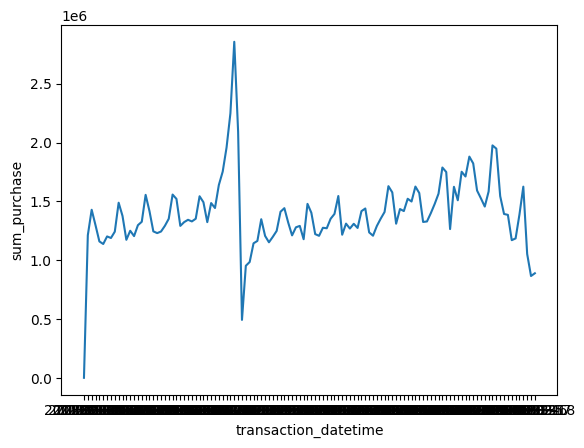

In [13]:
sns.lineplot(data=df_, x='transaction_datetime', y='sum_purchase')
plt.show()

In [18]:
df_2 = df.groupby(['transaction_datetime', 'weeks_since_card']).agg({'sum_purchase': 'sum', 'client_id': 'count'}).reset_index()

In [22]:
df_3 = df_2.pivot_table(index='transaction_datetime', columns='weeks_since_card', values='sum_purchase').reset_index()
df_3.columns = ['transaction_datetime', 'old_clients', 'new_clients']
df_3[['old_clients', 'new_clients']] = df_3[['old_clients', 'new_clients']].astype(int)

In [47]:
X1 = np.array([int(df_3.old_clients.mean()), int(df_3.new_clients.mean())])
X2 = df_3[df_3.transaction_datetime == '2018-12-30'][['old_clients', 'new_clients']].to_numpy()

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


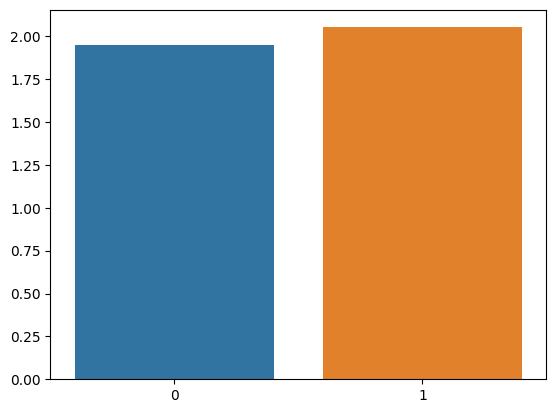

In [53]:
sns.barplot(X2 / X1)
plt.show()

In [54]:
df_4 = df_2.pivot_table(index='transaction_datetime', columns='weeks_since_card', values='client_id').reset_index()
df_4.columns = ['transaction_datetime', 'old_clients', 'new_clients']
df_4[['old_clients', 'new_clients']] = df_4[['old_clients', 'new_clients']].astype(int)

In [55]:
X1_ = np.array([int(df_4.old_clients.mean()), int(df_4.new_clients.mean())])
X2_ = df_4[df_4.transaction_datetime == '2018-12-30'][['old_clients', 'new_clients']].to_numpy()

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


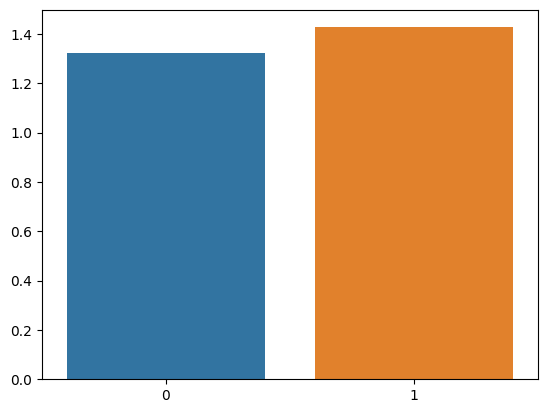

In [57]:
sns.barplot(X2_ / X1_)
plt.show()

In [58]:
df = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'transaction_datetime', 'sum_purchase', 'weeks_since_card'])
df_ = df[(df.weeks_since_card < 4)
         & (df.weeks_since_card >= 0)].groupby(['transaction_datetime', 'weeks_since_card']).agg({'sum_purchase': 'sum', 'client_id': 'count'}).reset_index()

In [72]:
df_2 = df_.pivot_table(index='transaction_datetime', values='sum_purchase', columns='weeks_since_card').fillna(0).astype(int).reset_index()

In [78]:
new_cl = df_2.iloc[:, 1:].mean(axis=0).reset_index()
new_cl.columns = ['weeks', 'mean_sum']
new_cl['weeks'] = new_cl['weeks'] + 1

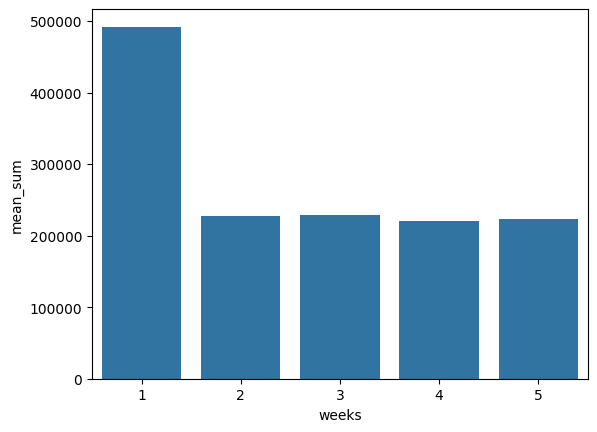

In [84]:
sns.barplot(data=new_cl, x='weeks', y='mean_sum')
plt.show()

In [ ]:
df_

In [94]:
df_ = df[(df.weeks_since_card < 4)
         & (df.weeks_since_card >= 0)].groupby(['transaction_datetime', 
                                                'weeks_since_card', 'client_id']).agg({'sum_purchase': 
                                                                                       ['sum']}).reset_index()

In [95]:
df_.columns = ['transaction_datetime', 'weeks_since_card', 'client_id', 'sum_purchase'
               ]

In [101]:
df_112 = df_.groupby(['weeks_since_card']).sum_purchase.mean().reset_index()
df_112.columns = ['weeks','mean_sum']
df_112.weeks = df_112['weeks'] + 1

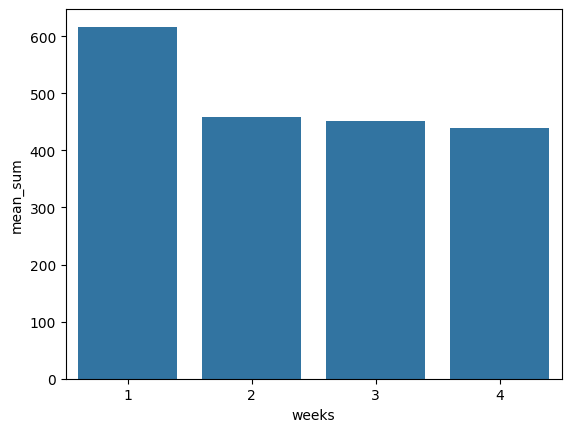

In [102]:
df_112
sns.barplot(data=df_112, x='weeks', y='mean_sum')
plt.show()

In [107]:
df_['month'] = pd.to_datetime(df_.transaction_datetime).dt.month

In [123]:
dff = df_.groupby(['month', 'weeks_since_card']).sum_purchase.mean().reset_index()
dff.month = dff.month.apply(lambda x: x + 12 if x < 6 else x)

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


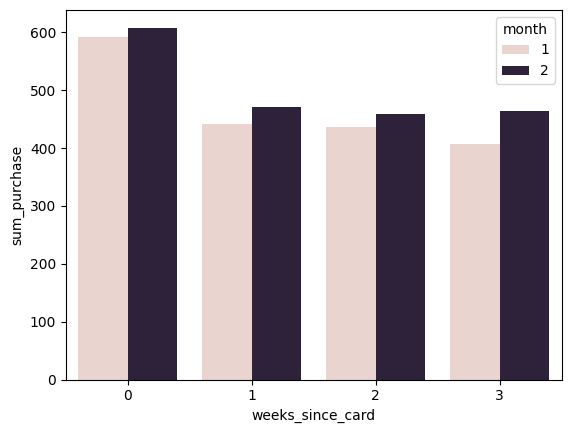

In [112]:
sns.barplot(dff[(dff.month == 1) | (dff.month == 2)], x='weeks_since_card', y='sum_purchase', hue='month')
plt.show()

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

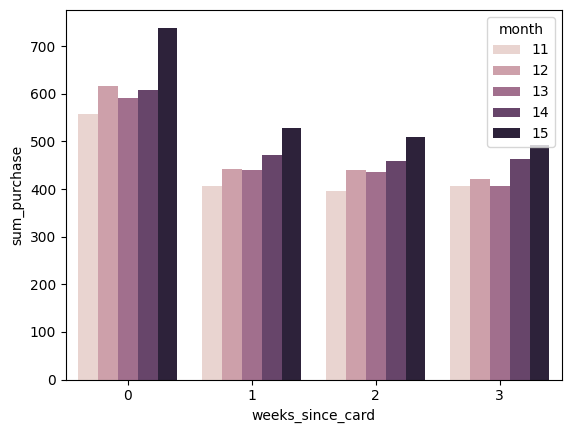

In [124]:
sns.barplot(dff, x='weeks_since_card', y='sum_purchase', hue='month')
plt.show()

In [143]:
df_pivot = df_.pivot_table(index='client_id', columns='weeks_since_card', values='sum_purchase').fillna(0).astype(int).reset_index()
df_pivot.columns = ['client_id', '0', '1', '2', '3']

In [156]:
nov = df_[(df_.weeks_since_card == 0) & (df_.transaction_datetime >= '2018-11-01') & (df_.transaction_datetime <= '2018-11-30')].client_id.to_list()
dec = df_[(df_.weeks_since_card == 0) & (df_.transaction_datetime >= '2018-12-01') & (df_.transaction_datetime <= '2018-12-31')].client_id.to_list()
jan = df_[(df_.weeks_since_card == 0) & (df_.transaction_datetime >= '2019-01-01') & (df_.transaction_datetime <= '2019-01-31')].client_id.to_list()
feb = df_[(df_.weeks_since_card == 0) & (df_.transaction_datetime >= '2019-02-01') & (df_.transaction_datetime <= '2019-02-28')].client_id.to_list()
mar = df_[(df_.weeks_since_card == 0) & (df_.transaction_datetime >= '2019-03-01') & (df_.transaction_datetime <= '2019-03-31')].client_id.to_list()

In [157]:
df_pivot_nov = df_pivot[df_pivot.client_id.isin(nov)]
df_pivot_dec = df_pivot[df_pivot.client_id.isin(dec)]
df_pivot_jan = df_pivot[df_pivot.client_id.isin(jan)]
df_pivot_feb = df_pivot[df_pivot.client_id.isin(feb)]
df_pivot_mar = df_pivot[df_pivot.client_id.isin(mar)]

In [158]:
df_pivot_nov = df_pivot_nov[df_pivot_nov['0'] != 0]
df_pivot_dec = df_pivot_dec[df_pivot_dec['0'] != 0]
df_pivot_jan = df_pivot_jan[df_pivot_jan['0'] != 0]
df_pivot_feb = df_pivot_feb[df_pivot_feb['0'] != 0]
df_pivot_mar = df_pivot_mar[df_pivot_mar['0'] != 0]

In [162]:
array1 = [(df_pivot_nov['0'] - df_pivot_nov['1']).mean(),
          (df_pivot_dec['0'] - df_pivot_dec['1']).mean(), (df_pivot_jan['0'] - df_pivot_jan['1']).mean(), 
          (df_pivot_feb['0'] - df_pivot_feb['1']).mean(), (df_pivot_mar['0'] - df_pivot_mar['1']).mean()]
array2 = [
          ((df_pivot_nov['0'] - df_pivot_nov['1']) / df_pivot_nov['0']).mean(), 
          ((df_pivot_dec['0'] - df_pivot_dec['1']) / df_pivot_dec['0']).mean(), 
          ((df_pivot_jan['0'] - df_pivot_jan['1']) / df_pivot_jan['0']).mean(),
          ((df_pivot_feb['0'] - df_pivot_feb['1']) / df_pivot_feb['0']).mean(),
          ((df_pivot_mar['0'] - df_pivot_mar['1']) / df_pivot_mar['0']).mean()
          ]

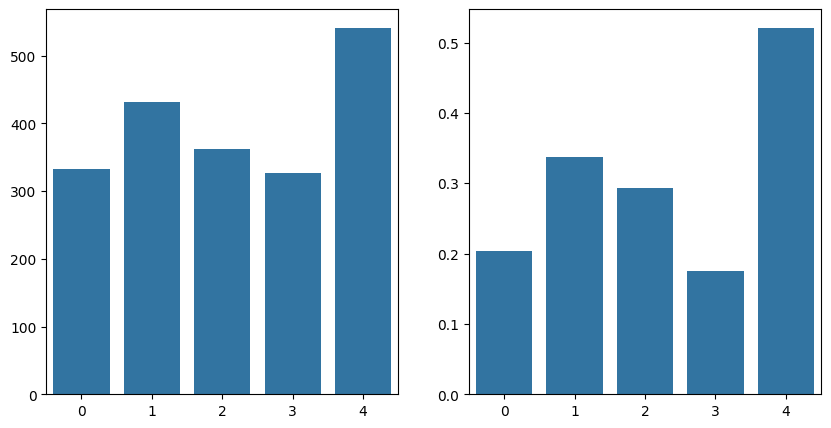

In [163]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.barplot(array1)
plt.subplot(122) 
sns.barplot(array2)
plt.show()

In [169]:
dd = df_[df_.weeks_since_card <= 1].groupby(['client_id', 'weeks_since_card', 'month']).sum_purchase.sum().reset_index()

In [172]:
dd

,client_id,weeks_since_card,month,sum_purchase
0,000048b7a6,0,12,445
1,0000eecb82,0,12,122
2,00035a21d9,0,2,1007
3,00038f9200,0,12,311
4,00038f9200,1,12,999
...,...,...,...,...
83238,fffbfc9346,0,2,206
83239,fffbfc9346,1,2,821
83240,fffc2e37ab,0,2,1282
83241,fffc6fd3ea,0,2,1729


In [173]:
dd.pivot(index=['client_id', 'month'], columns='weeks_since_card', values='sum_purchase').fillna(0).astype(int).reset_index()

weeks_since_card,client_id,month,0,1
0,000048b7a6,12,445,0
1,0000eecb82,12,122,0
2,00035a21d9,2,1007,0
3,00038f9200,12,311,999
4,0004315e57,11,531,0
...,...,...,...,...
62126,fff9aa288c,12,0,776
62127,fffbfc9346,1,262,0
62128,fffbfc9346,2,206,821
62129,fffc2e37ab,2,1282,0


In [4]:
pd.read_csv('purchases_processed.csv', nrows=1)

,client_id,transaction_id,transaction_datetime,sum_purchase,first_issue_date,age,gender,time_since_card,time_purchase_to_now,weeks_since_card
0,000012768d,6a0e96d0bc,2019-03-08,804,2017-08-05,45,U,more_than_90_days,30_days,82


In [5]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])

In [20]:
purchases_new_clients = purchases[(purchases.first_issue_date > '2018-11-11') 
                                  & (purchases.weeks_since_card <= 3)
                                 & (purchases.weeks_since_card >= 0)].reset_index(drop=True)

purchases_new_clients.first_issue_date = pd.to_datetime(purchases_new_clients.first_issue_date).dt.to_period('M')

In [34]:
ppr = purchases_new_clients.groupby(['client_id', 'first_issue_date', 'weeks_since_card']).sum_purchase.sum().reset_index()
ppr = ppr.groupby(['first_issue_date', 'weeks_since_card']).sum_purchase.mean().reset_index()
ppr.weeks_since_card = ppr.weeks_since_card + 1
ppr.sum_purchase = ppr.sum_purchase.astype(int)

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

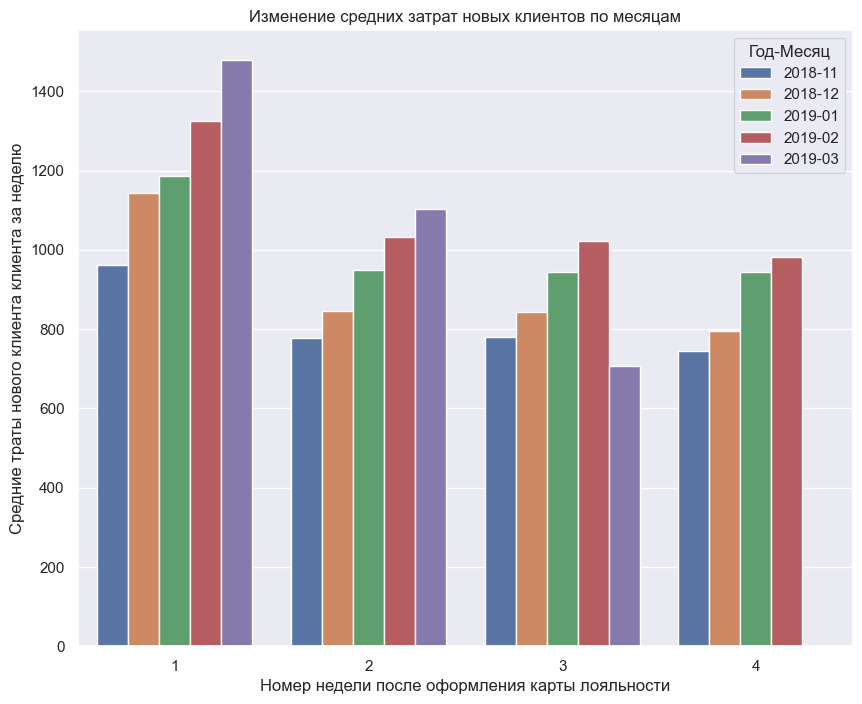

In [86]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.barplot(ppr, x='weeks_since_card', y='sum_purchase', hue='first_issue_date')
plt.title('Изменение средних затрат новых клиентов по месяцам')
plt.legend(['Ноябрь 2018', 'Декабрь 2018', 'Январь 2019', 'Февраль 2019', 'Март 2019'])
plt.ylabel('Средние траты нового клиента клиента за неделю')
plt.xlabel('Номер недели после оформления карты лояльности')
plt.legend(title='Год-Месяц')
plt.savefig("output.jpg", dpi=500)
plt.show()

In [93]:
ppr = purchases_new_clients.groupby(['client_id', 'first_issue_date', 'weeks_since_card']).sum_purchase.sum().reset_index()
ppr = ppr.groupby(['first_issue_date', 'weeks_since_card']).sum_purchase.mean().reset_index()
ppr.weeks_since_card = ppr.weeks_since_card + 1
ppr.sum_purchase = ppr.sum_purchase.astype(int)

In [104]:
ppr_ = ppr.pivot_table(index='first_issue_date', values='sum_purchase', columns='weeks_since_card').fillna(0).astype(int).reset_index()
ppr_.columns = ['first_issue_date', '1', '2', '3', '4']
ppr_['От 1 недели ко 2'] = (1 - ppr_['2'] / ppr_['1']) * 100
ppr_['От 2 недели к 3'] = (1 - ppr_['3'] / ppr_['2']) * 100
ppr_['От 3 недели к 4'] = (1 - ppr_['4'] / ppr_['3']) * 100

In [109]:
ppr_ = ppr_.melt(id_vars='first_issue_date', value_vars=['От 1 недели ко 2', 'От 2 недели к 3', 'От 3 недели к 4'], var_name='Неделя', value_name='ratio')

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

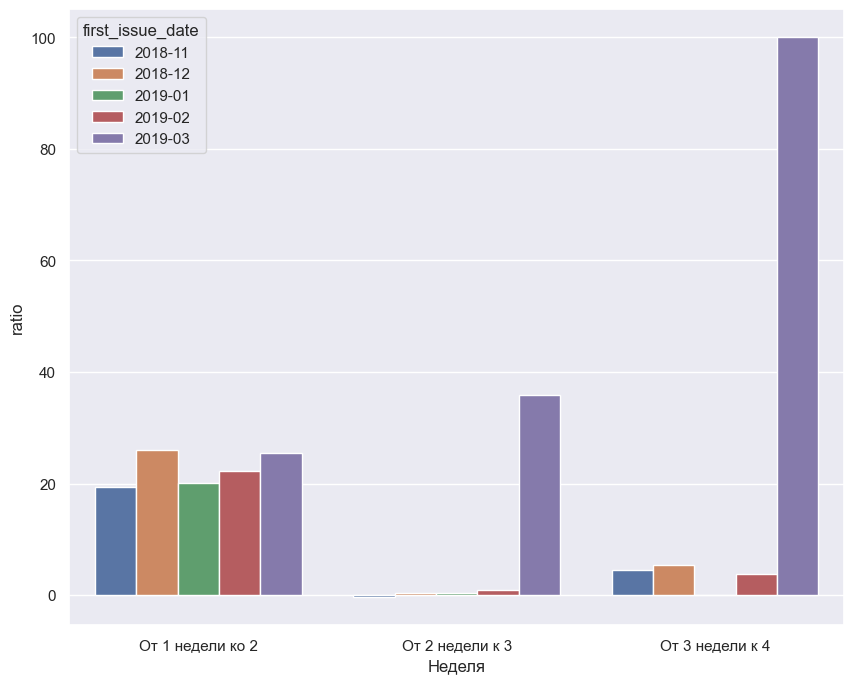

In [111]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.barplot(ppr_, x='Неделя', y='ratio', hue='first_issue_date')
plt.show()

In [194]:
purchases

,client_id,transaction_datetime,sum_purchase,first_issue_date,weeks_since_card
0,000012768d,2019-03-08,804,2017-08-05,84
1,000012768d,2018-12-01,1007,2017-08-05,71
2,000012768d,2019-03-14,419,2017-08-05,85
3,000012768d,2018-12-16,575,2017-08-05,73
4,000036f903,2018-12-21,700,2017-04-10,90
...,...,...,...,...,...
8045224,fffff6ce77,2019-01-19,158,2017-08-03,78
8045225,fffff6ce77,2019-02-28,446,2017-08-03,84
8045226,fffff6ce77,2019-02-03,183,2017-08-03,80
8045227,fffff6ce77,2019-01-16,2077,2017-08-03,77


In [141]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])

In [142]:
purchases_new_clients = purchases[(purchases.first_issue_date > '2018-11-11') 
                                  & (purchases.weeks_since_card <= 3)
                                 & (purchases.weeks_since_card >= 0)].reset_index(drop=True)
purchases_new_clients.weeks_since_card = purchases_new_clients.weeks_since_card + 1
purchases_new_clients.first_issue_date = pd.to_datetime(purchases_new_clients.first_issue_date).dt.to_period('M')
ppr = purchases_new_clients.groupby(['client_id', 'first_issue_date', 'weeks_since_card']).sum_purchase.sum().reset_index()

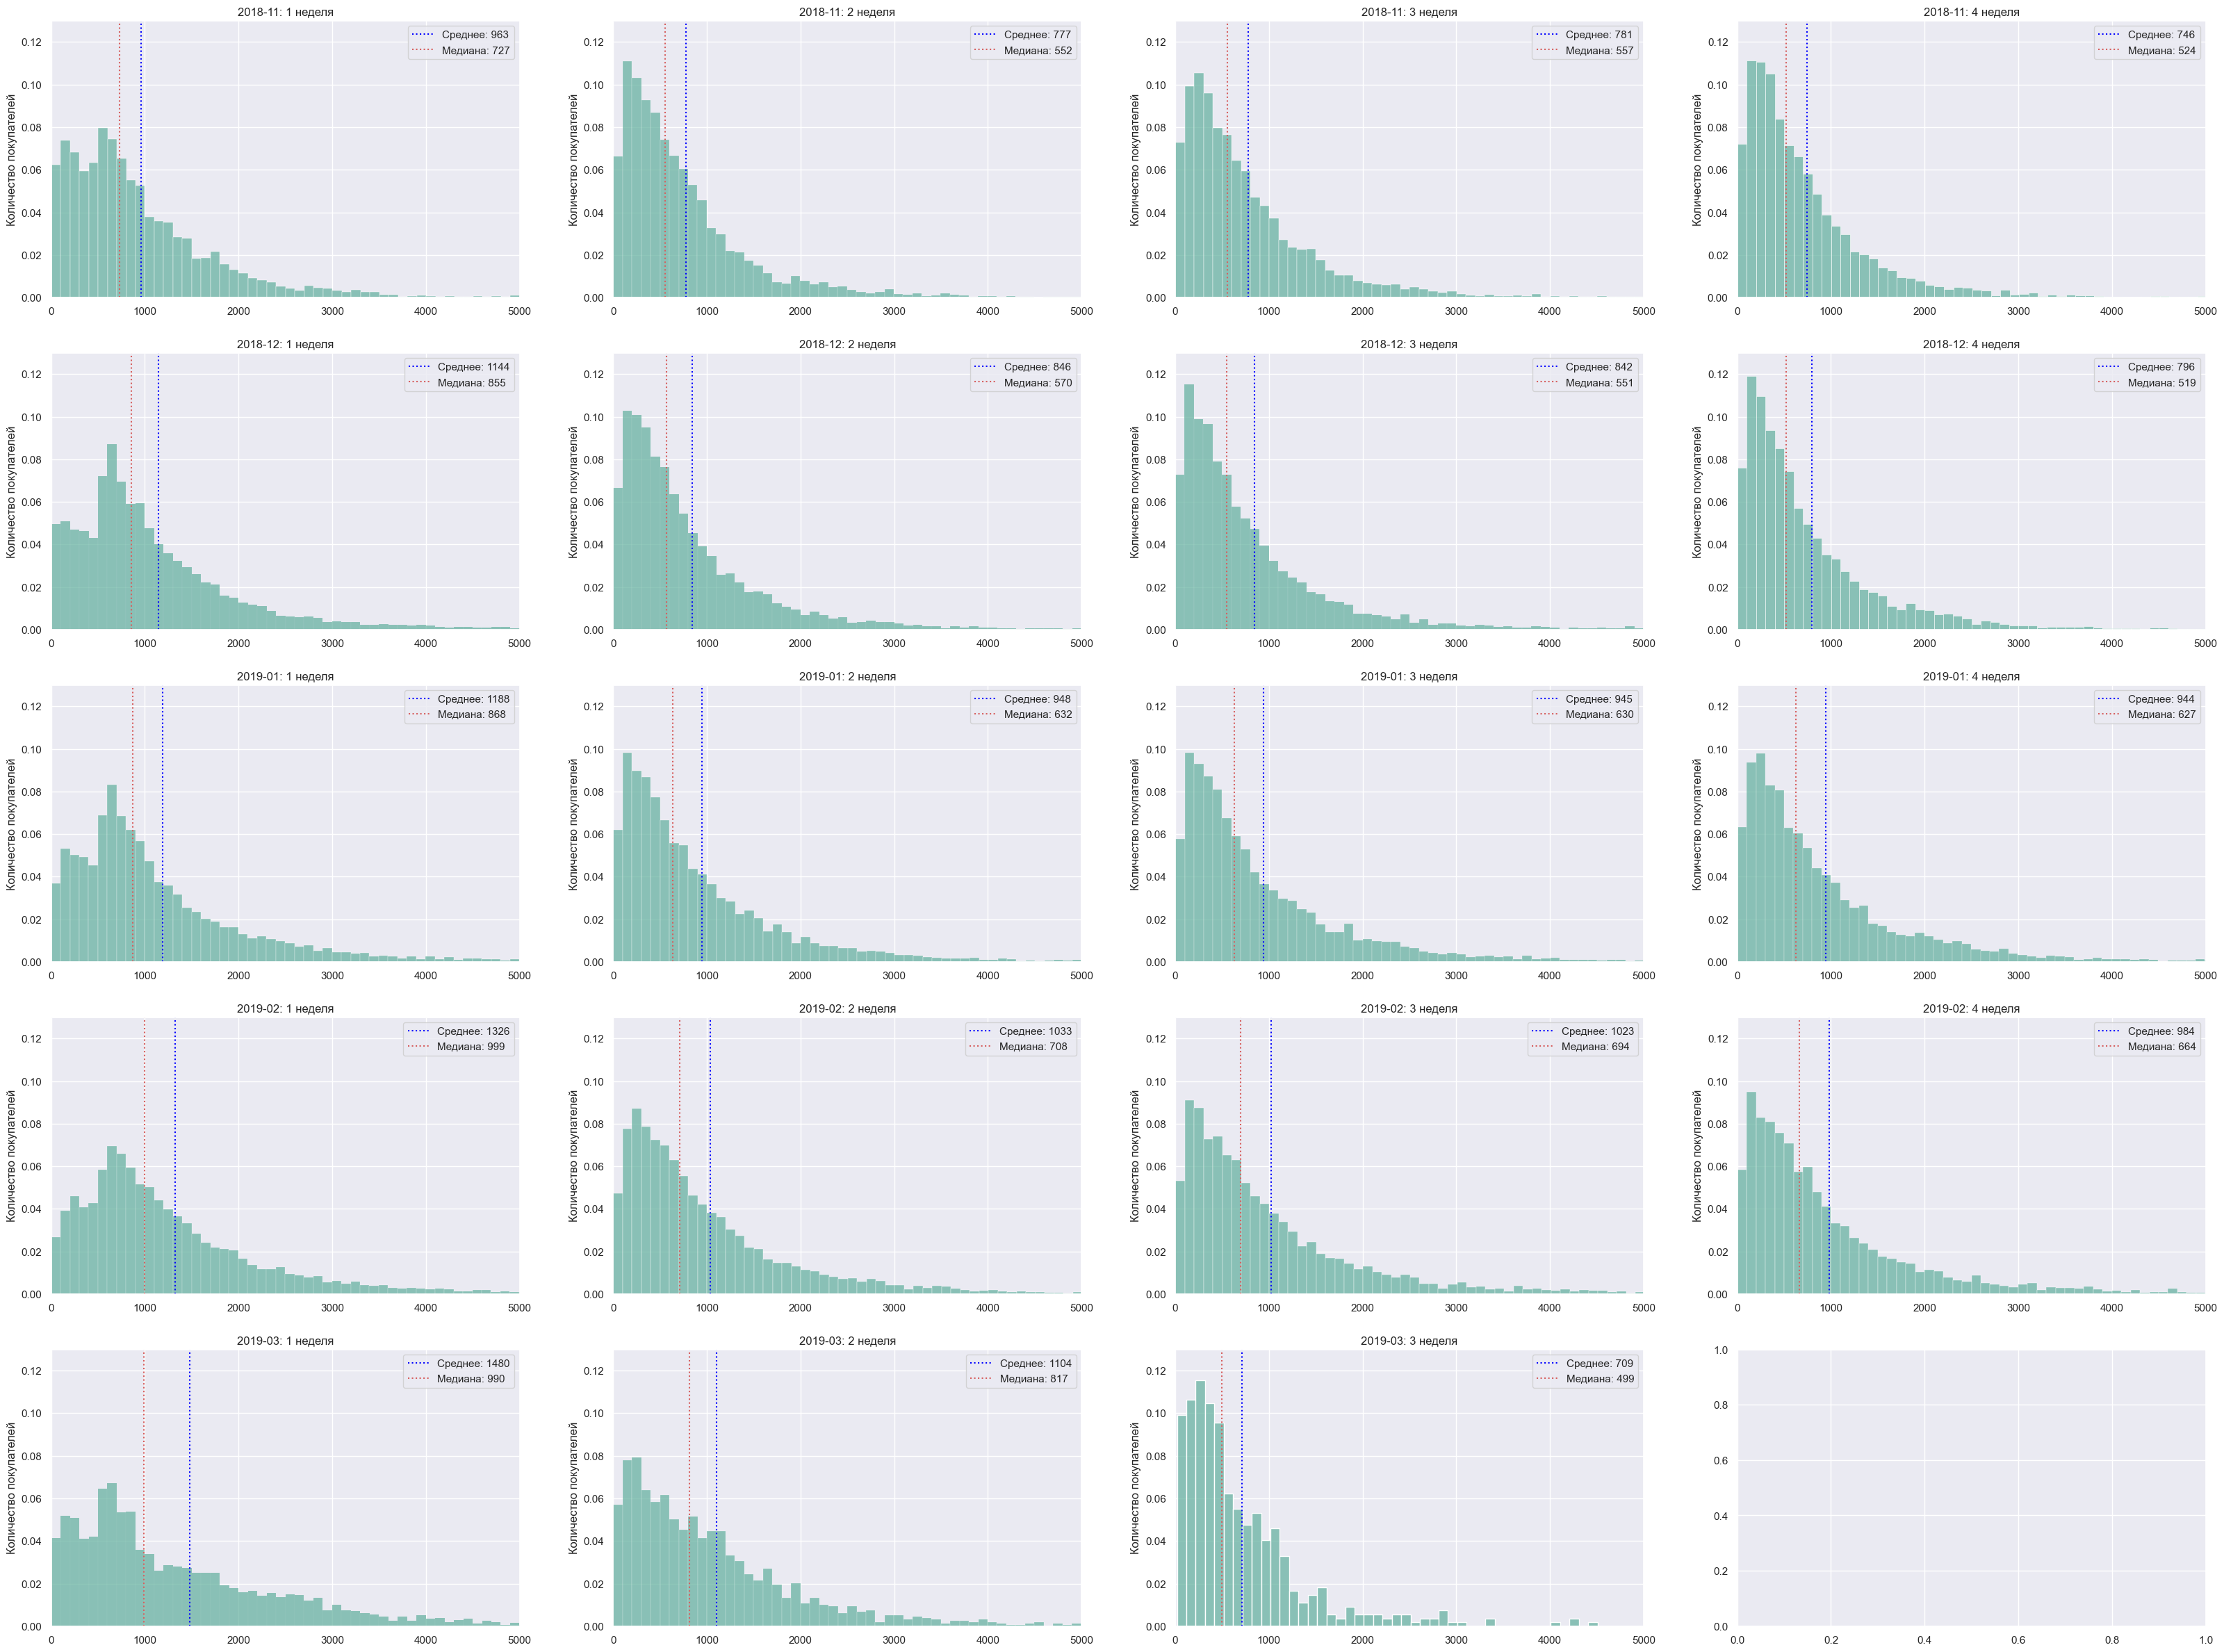

In [245]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(40, 30))

for i, el in enumerate(ppr.first_issue_date.sort_values().unique().tolist()):
    table = ppr[ppr.first_issue_date == el]
    for el2 in [1, 2, 3, 4]:
        plt.subplot(5, 4, 4*i+el2)
        sample = table[table.weeks_since_card == el2].sum_purchase
        if sample.shape[0] > 0:
            ax = sns.histplot(sample, binwidth=100, stat='probability', color='#69b3a2')
            sample_mean = sample.mean()
            sample_median = sample.median()
            legend = False
            if sample_mean != np.nan:
                legend = True
                plt.vlines(sample_mean, ymin=0, ymax=0.13, label=f'Среднее: {np.round(sample_mean).astype(int)}', color='blue', linestyles='dotted')
            if sample_median != np.nan:
                legend = True
                plt.vlines(sample_median, ymin=0, ymax=0.13, label=f'Медиана: {np.round(sample_median).astype(int)}', color='#D65F5F', linestyles='dotted')
            plt.title(f'{el}: {el2} неделя')
            plt.ylabel('Количество покупателей')
            plt.xlabel('')
            if legend:
                plt.legend()
            plt.xlim((0, 5000))
            plt.ylim((0, 0.13))
plt.savefig("output.jpg", dpi=500)
plt.show()

In [2]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])
purchases_new_clients = purchases[(purchases.first_issue_date > '2018-11-11') 
                                  & (purchases.weeks_since_card <= 3)
                                 & (purchases.weeks_since_card >= 0)].reset_index(drop=True)
purchases_new_clients.weeks_since_card = purchases_new_clients.weeks_since_card + 1
purchases_new_clients.first_issue_date = pd.to_datetime(purchases_new_clients.first_issue_date).dt.to_period('M')
purchases_new_clients = purchases_new_clients.groupby(['client_id', 'first_issue_date', 'weeks_since_card']).sum_purchase.sum().reset_index()
purchases_new_clients = purchases_new_clients.pivot(index=['client_id', 'first_issue_date'], values='sum_purchase', columns='weeks_since_card').fillna(0).astype(int).reset_index()
purchases_new_clients.columns = ['client_id', 'first_issue_date', '1', '2', '3', '4']

In [3]:
p = purchases_new_clients[(purchases_new_clients['1'] != 0) & (purchases_new_clients['2'] != 0)]
purchases_new_clients['Между 1 и 2 неделями'] = p['2'] - p['1']
p = purchases_new_clients[(purchases_new_clients['2'] != 0) & (purchases_new_clients['3'] != 0)]
purchases_new_clients['Между 2 и 3 неделями'] = p['3'] - p['2']
p = purchases_new_clients[(purchases_new_clients['3'] != 0) & (purchases_new_clients['4'] != 0)]
purchases_new_clients['Между 3 и 4 неделями'] = p['4'] - p['3']

In [4]:
ppr = purchases_new_clients.melt(id_vars=['first_issue_date'], 
                                 value_vars=['Между 1 и 2 неделями', 'Между 2 и 3 неделями', 'Между 3 и 4 неделями'], var_name='weeks', value_name='difference')

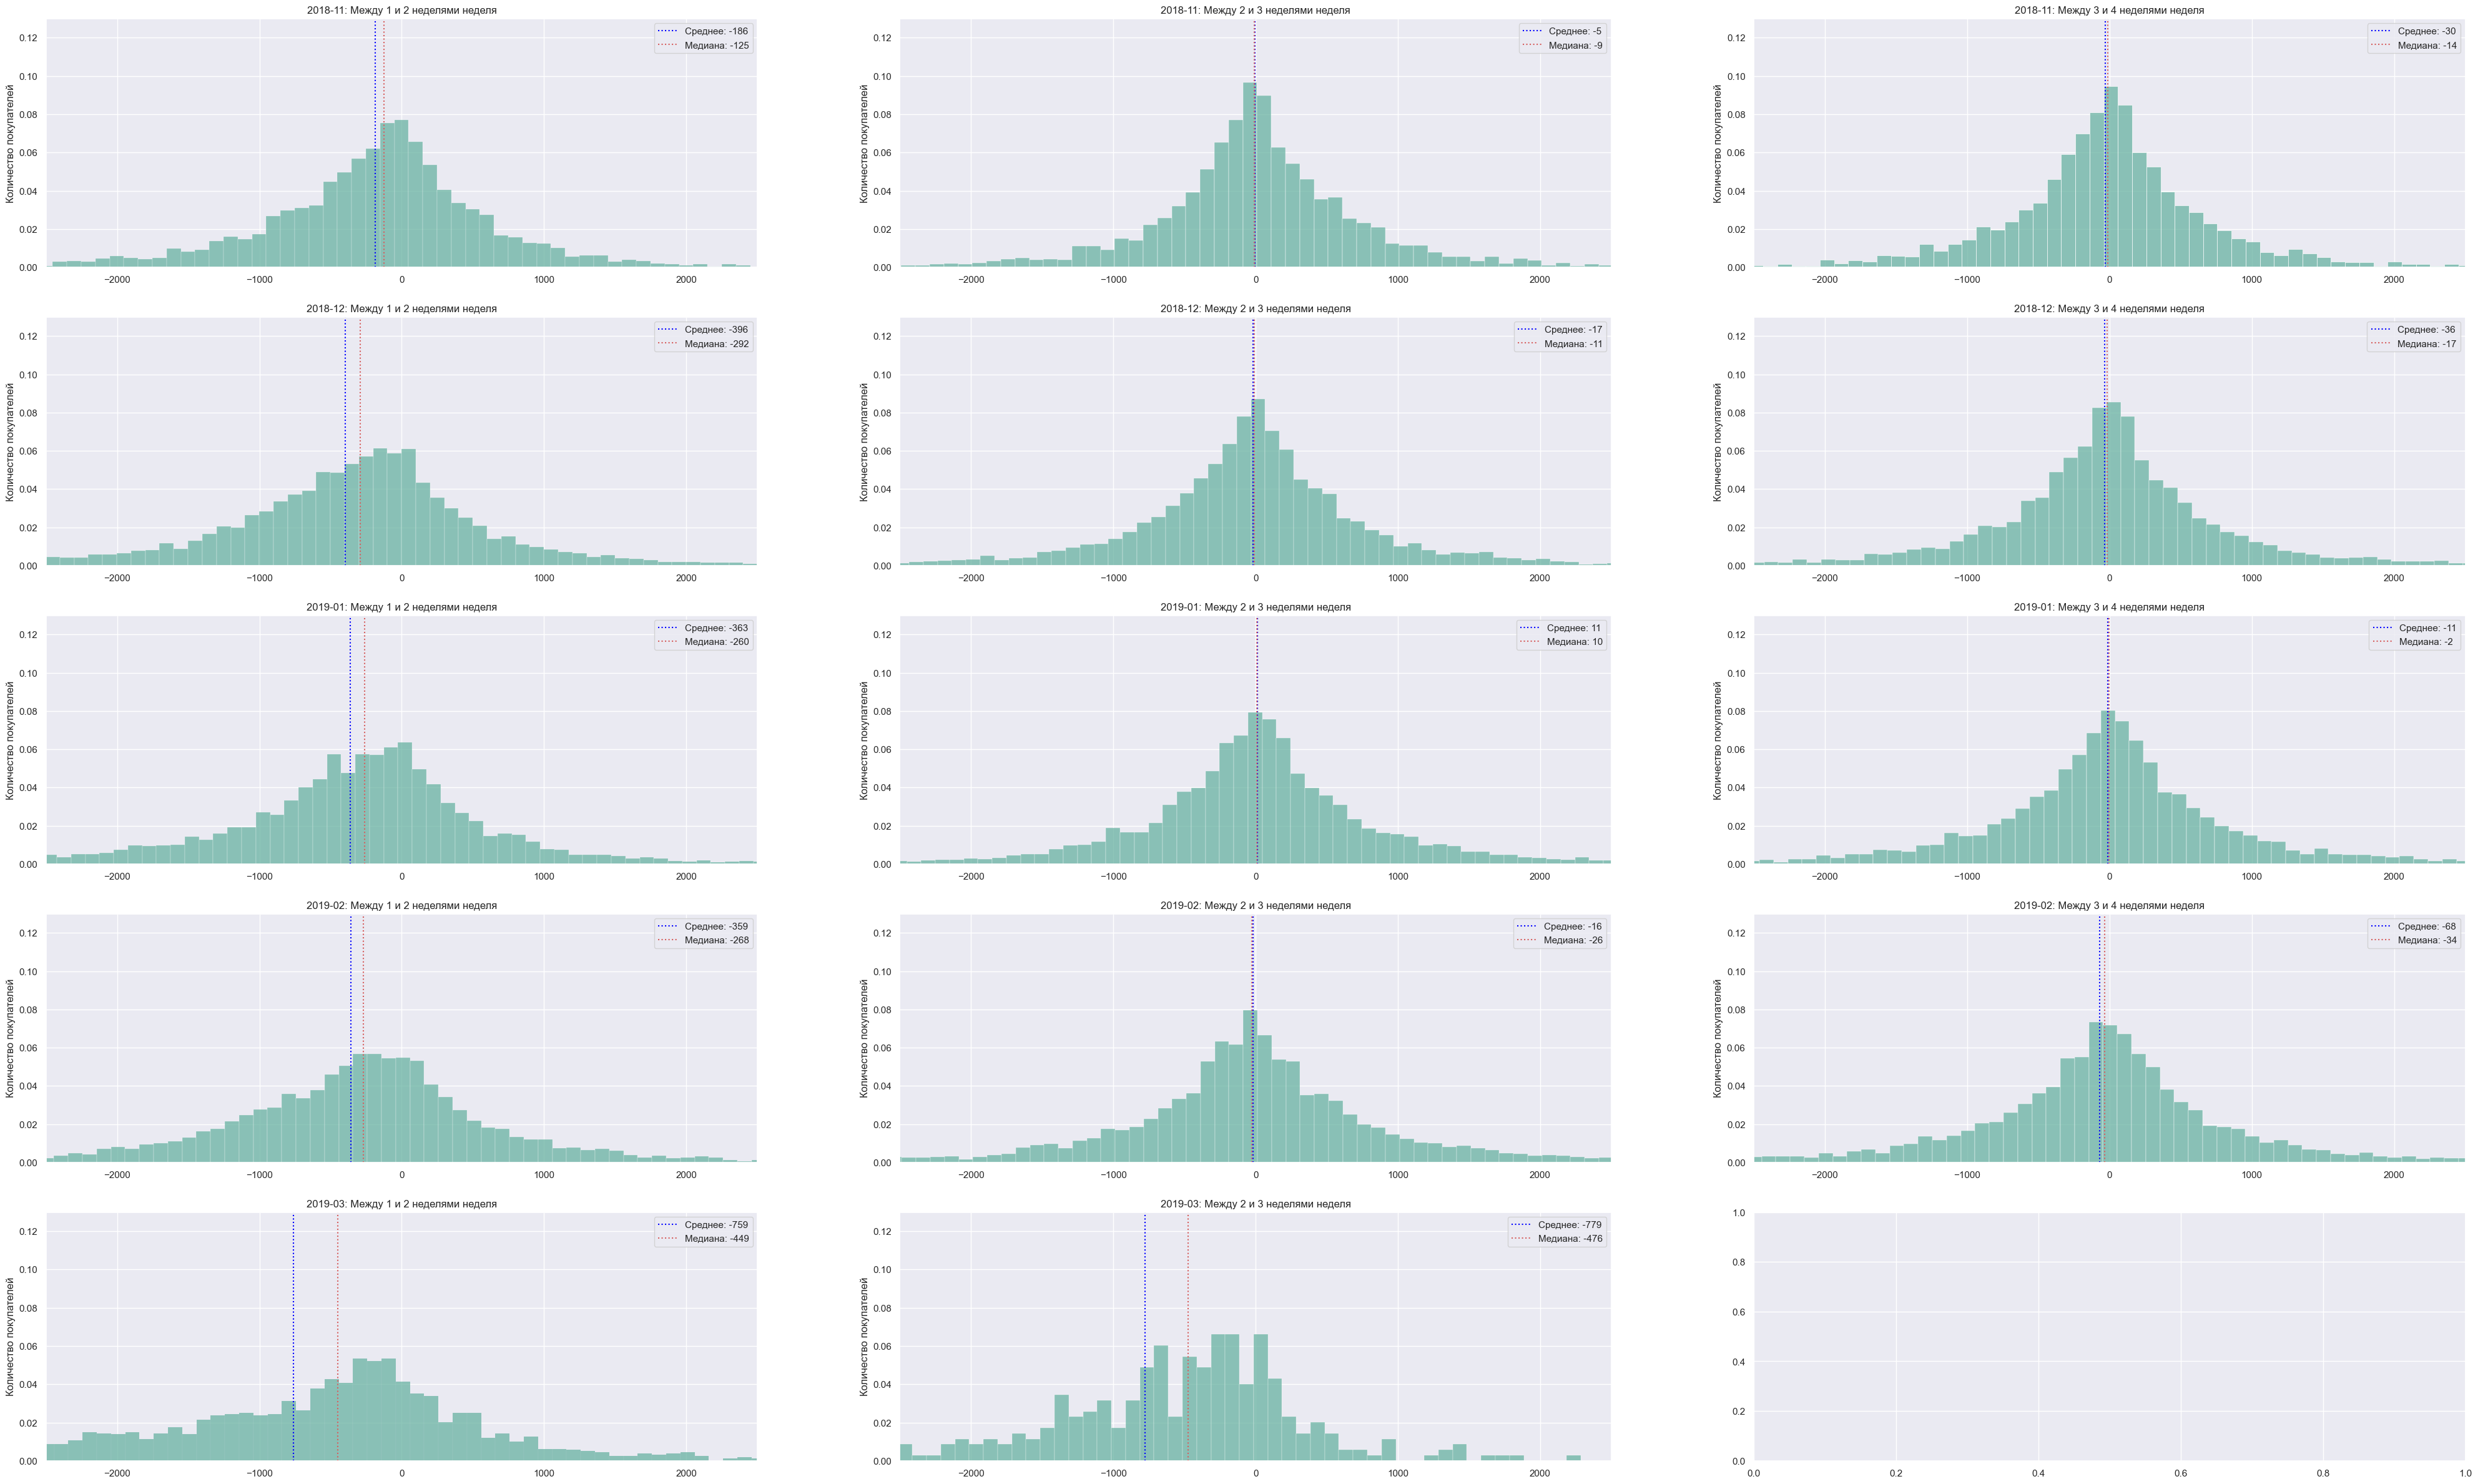

In [107]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50, 30))

for i, el in enumerate(ppr.first_issue_date.sort_values().unique().tolist()):
    table = ppr[ppr.first_issue_date == el]
    for j, el2 in enumerate(['Между 1 и 2 неделями', 'Между 2 и 3 неделями', 'Между 3 и 4 неделями']):
        plt.subplot(5, 3, 3*i+(j+1))
        sample = table[table.weeks == el2].difference.dropna()
        if sample.shape[0] > 0:
            ax = sns.histplot(sample, binwidth=100, stat='probability', color='#69b3a2')
            sample_mean = sample.mean()
            sample_median = sample.median()
            legend = False

            if sample_mean != np.nan:
                legend = True
                plt.vlines(sample_mean, ymin=0, ymax=0.13, label=f'Среднее: {np.round(sample_mean).astype(int)}', color='blue', linestyles='dotted')
            if sample_median != np.nan:
                legend = True
                plt.vlines(sample_median, ymin=0, ymax=0.13, label=f'Медиана: {np.round(sample_median).astype(int)}', color='#D65F5F', linestyles='dotted')
            plt.title(f'{el}: {el2} неделя')
            plt.ylabel('Количество покупателей')
            plt.xlabel('')
            if legend:
                plt.legend()
            plt.xlim((-2500, 2500))
            plt.ylim((0, 0.13))
plt.savefig("output.jpg", dpi=500)
plt.show()

In [5]:
samples = []
for i, el in enumerate(ppr.first_issue_date.sort_values().unique().tolist()):
    table = ppr[ppr.first_issue_date == el]
    samples2 = []
    for j, el2 in enumerate(['Между 1 и 2 неделями', 'Между 2 и 3 неделями', 'Между 3 и 4 неделями']):
        samples2.append(table[table.weeks == el2].difference.dropna().to_numpy())
    samples.append(samples2)

In [11]:
from scipy.stats import ttest_ind, normaltest, ttest_1samp

Видим, что не только визуально, но и статистическим тестом подтверждается нормальность распределения

In [125]:
print(normaltest(samples[0][0]).pvalue, normaltest(samples[1][0]).pvalue)
print(normaltest(samples[0][1]).pvalue, normaltest(samples[1][1]).pvalue)
print(normaltest(samples[0][2]).pvalue, normaltest(samples[1][2]).pvalue)

0.0 0.0
0.0 0.0
3.698189826842991e-158 0.0


Следовательно, можем применить тест о неравенстве средних

In [128]:
print(ttest_ind(samples[0][0], samples[1][0]))
print(ttest_ind(samples[0][1], samples[1][1]))
print(ttest_ind(samples[0][2], samples[1][2]))

TtestResult(statistic=8.241652480114631, pvalue=1.8790947247356194e-16, df=11703.0)
TtestResult(statistic=0.5854814032332444, pvalue=0.5582379569277668, df=9512.0)
TtestResult(statistic=0.31337799516664633, pvalue=0.7540002548774536, df=9676.0)


In [21]:
result = []
for i in range(3):
    lst = []
    for j in range(3):
        lst.append(ttest_ind(samples[i][j], samples[i+1][j], equal_var=False).pvalue)
    result.append(lst)

In [22]:
result

[[4.804331567540452e-17, 0.545326055587569, 0.7426817784313174],
 [0.10999656973498542, 0.1714350722424939, 0.19255534598392024],
 [0.8630228245092985, 0.22024308366417425, 0.009910923517498239]]

In [23]:
import statsmodels.stats.api as sms

In [ ]:
#f'[{np.round(x1, 2)}, {np.round(x2, 2)}]'

In [44]:
result = []
for i in range(3):
    lst = []
    for j in range(3):
        x1, x2 = sms.CompareMeans(sms.DescrStatsW(samples[i+1][j]), 
                                    sms.DescrStatsW(samples[i][j])).tconfint_diff(usevar='unequal')   
        lst.append([np.round(x1, 2), np.round(x2, 2)])
    result.append(lst)

In [45]:
pd.DataFrame(result)

,0,1,2
0,"[-258.4, -160.79]","[-52.87, 27.94]","[-43.76, 31.2]"
1,"[-7.4, 72.81]","[-12.15, 68.26]","[-12.7, 63.08]"
2,"[-38.86, 46.37]","[-69.45, 16.0]","[-101.31, -13.82]"


c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Axes: >

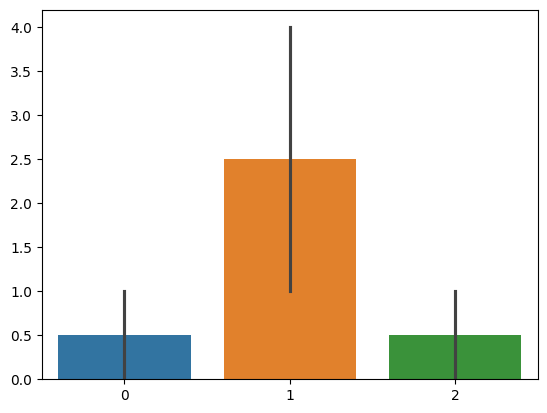

In [35]:
sns.barplot([[0, 1],[1, 4],[0, 1]])

In [53]:
result[0][0][0]

-258.4

In [54]:
result

[[[-258.4, -160.79], [-52.87, 27.94], [-43.76, 31.2]],
 [[-7.4, 72.81], [-12.15, 68.26], [-12.7, 63.08]],
 [[-38.86, 46.37], [-69.45, 16.0], [-101.31, -13.82]]]

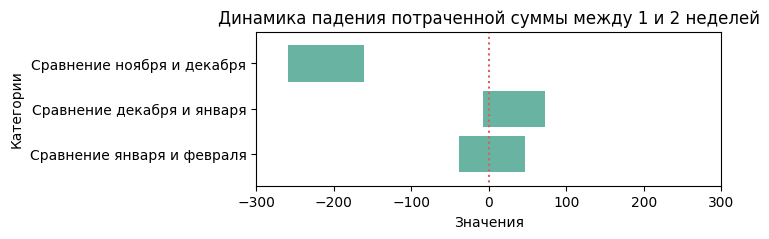

In [89]:
categories = ['Сравнение ноября и декабря', 'Сравнение декабря и января', 'Сравнение января и февраля'][::-1]
lefts = [result[0][0][0], result[1][0][0], result[2][0][0]][::-1]
values = [result[0][0][1], result[1][0][1], result[2][0][1]][::-1]

fig, ax = plt.subplots(figsize=(6, 2))

bars = ax.barh(categories, values, color='#69b3a2')

for bar, left in zip(bars, lefts):
    bar.set_x(left)
    bar.set_width(bar.get_width() - left)

ax.set_ylabel('Категории')
ax.set_xlabel('Значения')
ax.set_title('Динамика падения потраченной суммы между 1 и 2 неделей')
plt.xlim(-300, 300)
plt.ylim(-0.7, 2.7)
plt.vlines(0, ymin=-1, ymax=3, color='#D65F5F', linestyles='dotted')
plt.savefig("output.jpg", dpi=500)
plt.show()

In [68]:
result[0]

[[-258.4, -160.79], [-52.87, 27.94], [-43.76, 31.2]]

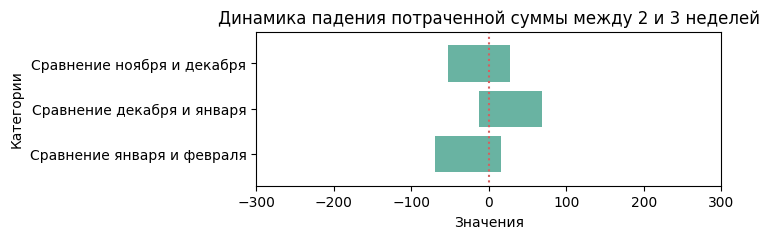

In [88]:
categories = ['Сравнение ноября и декабря', 'Сравнение декабря и января', 'Сравнение января и февраля'][::-1]
lefts = [result[0][1][0], result[1][1][0], result[2][1][0]][::-1]
values = [result[0][1][1], result[1][1][1], result[2][1][1]][::-1]

fig, ax = plt.subplots(figsize=(6, 2))

bars = ax.barh(categories, values, color='#69b3a2')

for bar, left in zip(bars, lefts):
    bar.set_x(left)
    bar.set_width(bar.get_width() - left)
plt.ylim(-0.7, 2.7)
plt.vlines(0, ymin=-1, ymax=3, color='#D65F5F', linestyles='dotted')
ax.set_ylabel('Категории')
ax.set_xlabel('Значения')
ax.set_title('Динамика падения потраченной суммы между 2 и 3 неделей')
plt.xlim(-300, 300)
plt.savefig("output.jpg", dpi=500)
plt.show()

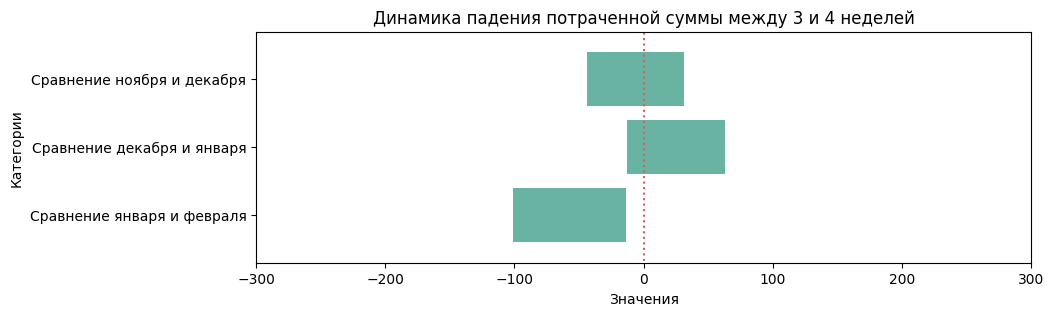

In [92]:
categories = ['Сравнение ноября и декабря', 'Сравнение декабря и января', 'Сравнение января и февраля'][::-1]
lefts = [result[0][2][0], result[1][2][0], result[2][2][0]][::-1]
values = [result[0][2][1], result[1][2][1], result[2][2][1]][::-1]

fig, ax = plt.subplots(figsize=(6, 2))

bars = ax.barh(categories, values, color='#69b3a2')

for bar, left in zip(bars, lefts):
    bar.set_x(left)
    bar.set_width(bar.get_width() - left)
plt.ylim(-0.7, 2.7)
plt.vlines(0, ymin=-1, ymax=3, color='#D65F5F', linestyles='dotted')
ax.set_ylabel('Категории')
ax.set_xlabel('Значения')
ax.set_title('Динамика падения потраченной суммы между 3 и 4 неделей')
plt.xlim(-300, 300)
plt.savefig("output.jpg", dpi=500)
plt.show()

In [91]:
import numpy as np
import scipy.stats as stats


# Доверительные интервалы для дисперсий
def variance_conf_interval(data, alpha=0.05):
    n = len(data)
    s2 = np.var(data, ddof=1)
    chi2_lower = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_upper = stats.chi2.ppf(1 - alpha / 2, n - 1)
    lower = (n - 1) * s2 / chi2_upper
    upper = (n - 1) * s2 / chi2_lower
    return lower, upper

# Доверительные интервалы для средних
def mean_conf_interval(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    t = stats.t.ppf(1 - alpha / 2, n - 1)
    lower = mean - t * se
    upper = mean + t * se
    return lower, upper

# Доверительный интервал для разницы между средними
def difference_means_conf_interval(data1, data2, alpha=0.05):
    n1, n2 = len(data1), len(data2)
    mean1, mean2 = np.mean(data1), np.mean(data2)
    var1, var2 = np.var(data1, ddof=1), np.var(data2, ddof=1)
    se = np.sqrt(var1 / n1 + var2 / n2)
    df = (var1 / n1 + var2 / n2) ** 2 / ((var1 / n1) ** 2 / (n1 - 1) + (var2 / n2) ** 2 / (n2 - 1))
    t = stats.t.ppf(1 - alpha / 2, df)
    lower = (mean1 - mean2) - t * se
    upper = (mean1 - mean2) + t * se
    return lower, upper

In [132]:
variance_conf_interval(samples[0][0]), mean_conf_interval(samples[0][0])

((1284712.015225448, 1421643.9707641632),
 (-227.72892813408149, -144.49588841028142))

In [139]:
print(difference_means_conf_interval(samples[0][0], samples[1][0], alpha=0.05))
print(difference_means_conf_interval(samples[1][0], samples[2][0], alpha=0.05))
print(difference_means_conf_interval(samples[2][0], samples[3][0], alpha=0.05))

(160.7921546636665, 258.4014277812895)
(-72.81449875286077, 7.403795486495788)
(-46.365566096991515, 38.863704761778294)


In [134]:
difference_means_conf_interval(samples[0][0], samples[1][0], alpha=0.05)

(160.7921546636665, 258.4014277812895)

In [92]:
# Бутстрапирование
def bootstrap_mean_confidence_interval(data, n_bootstrap=10000, alpha=0.05):
    boot_means = []
    n = len(data)
    for _ in range(n_bootstrap):
        boot_sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(boot_sample))
    lower = np.percentile(boot_means, 100 * alpha / 2)
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper, boot_means

# Перестановочный тест
def permutation_test(data1, data2, test_diff, n_permutations=10000):
    combined = np.concatenate([data1, data2])
    n1, n2 = len(data1), len(data2)
    actual_diff = np.mean(data1) - np.mean(data2)
    perm_diffs = []
    for _ in range(n_permutations):
        permuted = np.random.permutation(combined)
        perm_diffs.append(np.mean(permuted[:n1]) - np.mean(permuted[n1:]))
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(test_diff))
    return actual_diff, p_value

Тесты для сумм трат

In [145]:
sums_samples = []

for i, el in enumerate(ppr.first_issue_date.sort_values().unique().tolist()):
    table = ppr[ppr.first_issue_date == el]
    samples2 = []
    for el2 in [1, 2, 3, 4]:
        samples2.append(table[table.weeks_since_card == el2].sum_purchase.to_numpy())
    sums_samples.append(samples2)

In [205]:
import matplotlib

In [208]:
matplotlib.rcParams['axes.titlepad'] = 30
dct1 = {0: 'Ноябрь 2018', 1: 'Декабрь 2018', 2: 'Январь 2019', 3: "Февраль 2019", 4: "Март 2019"}

In [ ]:
for i in range(5):
    for k in range(4):
        SAMPLE = sums_samples[i][k]

        plt.figure(figsize=(12, 6))

        plt.subplot(121)
        sns.histplot(SAMPLE, stat='probability', color='#69b3a2')
        plt.vlines(SAMPLE.mean(), ymin=0, ymax=0.13, color='red', linestyles='dotted', label=f'Среднее: {np.round(SAMPLE.mean()).astype(int)}')
        plt.xlim(0, 2500)
        plt.ylim(0, 0.11)
        plt.legend()
        plt.xlabel('Сумма покупки')

        plt.subplot(122)

        lower, upper, boot_means = bootstrap_mean_confidence_interval(SAMPLE)
        sns.histplot(boot_means, stat='probability', color='#69b3a2')
        smp_mean = np.array(boot_means).mean()
        #plt.vlines(smp_mean, ymin=0, ymax=0.06, color='red', linestyles='dotted', label=f'Среднее: {np.round(smp_mean).astype(int)}')
        plt.fill_between([lower, upper], [0.06, 0.06], color='blue', alpha=0.1)
        plt.ylim(0, 0.06)
        plt.legend([f'Доверительный интервал: {[np.round(lower).astype(int), 
                                                np.round(upper).astype(int)]}'])
        plt.xlabel('Сумма покупки')

        plt.suptitle(f'Бутстрапированный доверительный интервал  для среднего значения: {dct1[i]}, неделя {k+1}')
        plt.savefig(f"Image_{i}-{k}.jpg", dpi=500)
        plt.show()

In [230]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])

In [3]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])
purchases['new_client'] = purchases.weeks_since_card.apply(lambda x: 1 if x <= 3 else 0)
purchases['period'] = pd.to_datetime(purchases.transaction_datetime).dt.to_period('M')
purchases['card_period'] = pd.to_datetime(purchases.first_issue_date).dt.to_period('M')

In [4]:
new_cl = purchases.groupby(['client_id', 'card_period', 'new_client']).sum_purchase.sum().reset_index()
new_cl = new_cl[new_cl.new_client == 1][['card_period', 'sum_purchase']]
cl = new_cl.groupby(['card_period']).sum_purchase.mean().astype(int).reset_index()

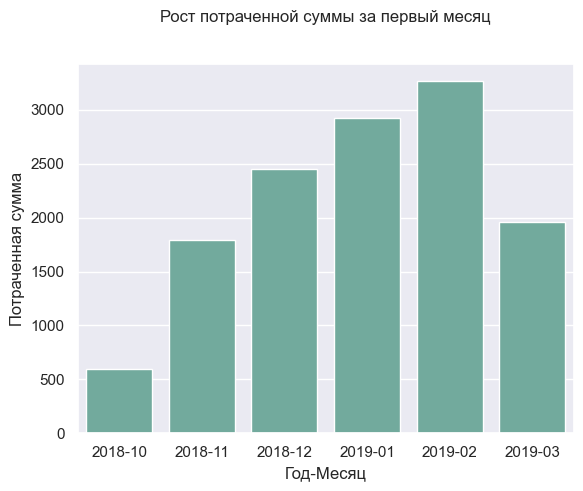

In [279]:
sns.barplot(cl, x='card_period', y='sum_purchase', color='#69b3a2')
plt.xlabel('Год-Месяц')
plt.ylabel('Потраченная сумма')
plt.title('Рост потраченной суммы за первый месяц')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [281]:
cl

,card_period,sum_purchase
0,2018-10,592
1,2018-11,1793
2,2018-12,2455
3,2019-01,2923
4,2019-02,3265
5,2019-03,1962


In [11]:
old_cl = purchases.groupby(['client_id', 'period', 'new_client']).sum_purchase.sum().reset_index()
old_cl = old_cl[old_cl.new_client == 0][['period', 'sum_purchase']]
old_cl = old_cl.groupby('period').sum_purchase.mean().astype(int).reset_index()
cl['new_client'] = 1
old_cl['new_client'] = 0
cl.columns = ['period', 'sum_purchase', 'new_client']
old_cl = pd.concat((cl.iloc[1:, :], old_cl))
old_cl.columns = ['Год-Месяц', 'Средняя потраченная сумма за месяц', 'Новый клиент']

In [12]:
old_cl[''] = old_cl['Новый клиент'].replace({0:'Старый клиент', 1: 'Новый клиент'})

In [14]:
sns.set_theme(style="darkgrid")

C:\Users\alexa\AppData\Local\Temp\ipykernel_19968\11213988.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#69b3a2'` for the same effect.

  sns.barplot(old_cl, x='Год-Месяц', y='Средняя потраченная сумма за месяц', hue='',color='#69b3a2')
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


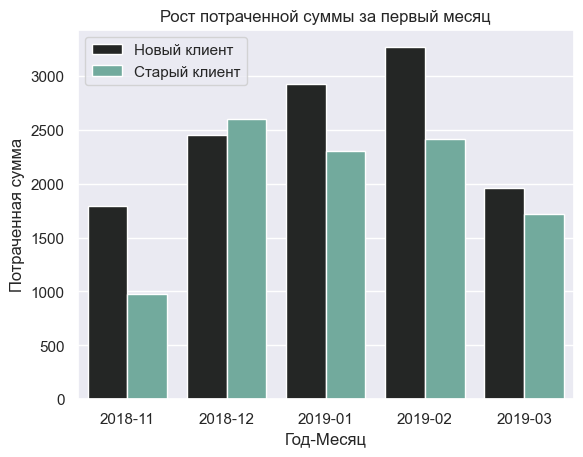

In [15]:
sns.barplot(old_cl, x='Год-Месяц', y='Средняя потраченная сумма за месяц', hue='',color='#69b3a2')
plt.xlabel('Год-Месяц')
plt.ylabel('Потраченная сумма')
plt.title('Рост потраченной суммы за первый месяц')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [16]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])
purchases['new_client'] = purchases.weeks_since_card.apply(lambda x: 1 if x <= 3 else 0)
purchases['period'] = pd.to_datetime(purchases.transaction_datetime).dt.to_period('M')
purchases['card_period'] = pd.to_datetime(purchases.first_issue_date).dt.to_period('M')

In [17]:
old_cl = purchases.groupby(['client_id', 'period', 'new_client']).sum_purchase.sum().reset_index()
old_cl = old_cl[old_cl.new_client == 0][['period', 'sum_purchase']]
old_cl = old_cl.groupby('period').sum_purchase.mean().astype(int).reset_index()
new_cl = purchases[(purchases.weeks_since_card >= 1) 
          & (purchases.weeks_since_card <= 3)].groupby(['client_id', 'card_period']).sum_purchase.sum().reset_index()
old_cl.sum_purchase = np.round(old_cl.sum_purchase * 3/4).astype(int)
old_cl['new_client'] = 0
new_cl = new_cl.groupby('card_period').sum_purchase.mean().astype(int).reset_index()
new_cl.columns = ['period', 'sum_purchase']
new_cl['new_client'] = 1
old_cl = pd.concat((old_cl, new_cl.iloc[1:, :])).reset_index(drop=True)
old_cl.columns = ['Год-Месяц', 'Средняя потраченная сумма за месяц', 'Новый клиент']

In [24]:
old_cl = old_cl.sort_values('Новый клиент', ascending=False)

In [18]:
old_cl[''] = old_cl['Новый клиент'].replace({0: 'Старый клиент', 1: 'Новый клиент'})

C:\Users\alexa\AppData\Local\Temp\ipykernel_19968\2176695479.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#69b3a2'` for the same effect.

  sns.barplot(old_cl, x='Год-Месяц', y='Средняя потраченная сумма за месяц', hue='', color='#69b3a2')
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)

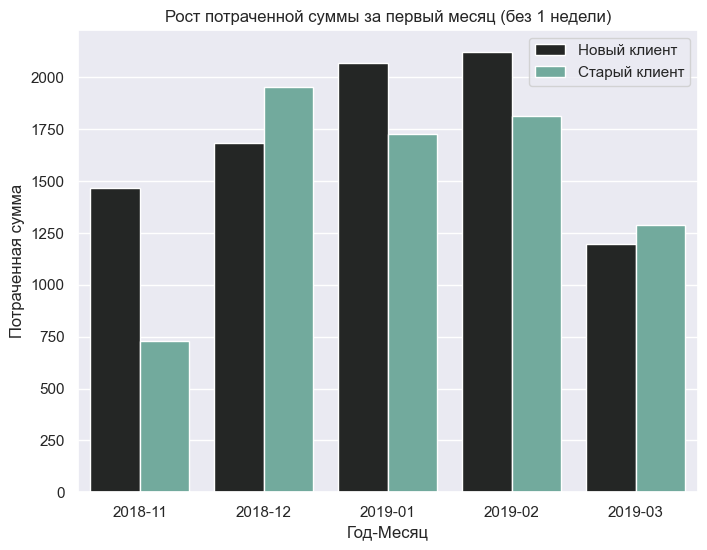

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(old_cl, x='Год-Месяц', y='Средняя потраченная сумма за месяц', hue='', color='#69b3a2')
plt.xlabel('Год-Месяц')
plt.ylabel('Потраченная сумма')
plt.title('Рост потраченной суммы за первый месяц (без 1 недели)')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [361]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'sum_purchase', 'first_issue_date', 'transaction_datetime', 'weeks_since_card'])
purchases['new_client'] = purchases.weeks_since_card.apply(lambda x: 1 if x <= 3 else 0)
purchases['period'] = pd.to_datetime(purchases.transaction_datetime).dt.to_period('M')
purchases['card_period'] = pd.to_datetime(purchases.first_issue_date).dt.to_period('M')

In [362]:
old_cl = purchases.groupby(['client_id', 'period', 'new_client']).sum_purchase.sum().reset_index()
old_cl = old_cl[old_cl.new_client == 0][['period', 'sum_purchase']]
old_cl = old_cl.groupby('period').sum_purchase.mean().astype(int).reset_index()
new_cl = purchases[(purchases.weeks_since_card >= 2) 
          & (purchases.weeks_since_card <= 3)].groupby(['client_id', 'card_period']).sum_purchase.sum().reset_index()
old_cl.sum_purchase = np.round(old_cl.sum_purchase / 2).astype(int)
old_cl['new_client'] = 0
new_cl = new_cl.groupby('card_period').sum_purchase.mean().astype(int).reset_index()
new_cl.columns = ['period', 'sum_purchase']
new_cl['new_client'] = 1
old_cl = pd.concat((old_cl, new_cl.iloc[1:, :])).reset_index(drop=True)
old_cl.columns = ['Год-Месяц', 'Средняя потраченная сумма за месяц', 'Новый клиент']

C:\Users\alexa\AppData\Local\Temp\ipykernel_6248\1967559108.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#69b3a2'` for the same effect.

  sns.barplot(old_cl, x='Год-Месяц', y='Средняя потраченная сумма за месяц', hue='Новый клиент',color='#69b3a2')
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

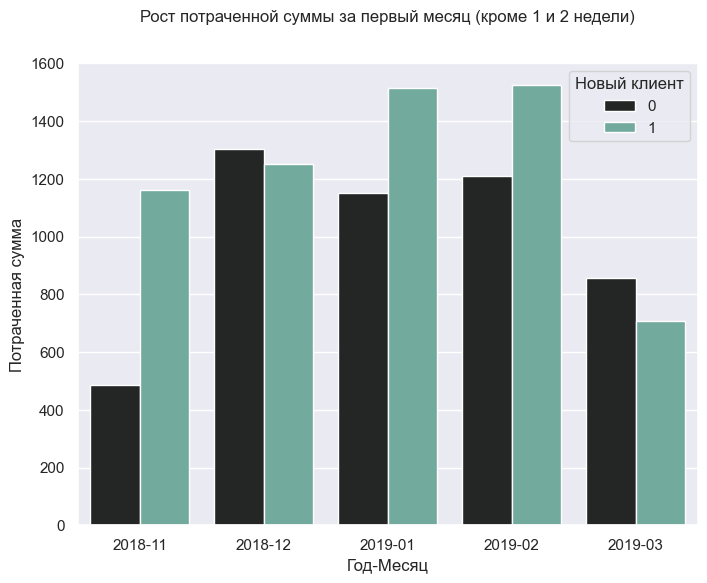

In [363]:
plt.figure(figsize=(8, 6))
sns.barplot(old_cl, x='Год-Месяц', y='Средняя потраченная сумма за месяц', hue='Новый клиент',color='#69b3a2')
plt.xlabel('Год-Месяц')
plt.ylabel('Потраченная сумма')
plt.title('Рост потраченной суммы за первый месяц (кроме 1 и 2 недели)')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [434]:
new_cl = purchases[(purchases.weeks_since_card >= 0) 
          & (purchases.weeks_since_card <= 3)].groupby(['client_id', 'card_period', 'weeks_since_card']).sum_purchase.sum().reset_index()
new_cl = new_cl.groupby(['weeks_since_card', 'card_period']).sum_purchase.mean().astype(int).reset_index()
new_cl = new_cl.pivot_table(index='card_period', columns='weeks_since_card', values='sum_purchase').fillna(0).astype(int).reset_index()
new_cl = new_cl.iloc[1:5, :]
new_cl['total'] = new_cl.iloc[:, 1:].sum(axis=1)
new_cl.columns = ['card_period', '0', '1', '2', '3', 'total']

In [421]:
new_cl

,card_period,0,1,2,3,total
1,2018-11,963,758,755,765,3241
2,2018-12,1143,845,842,796,3626
3,2019-01,1187,948,944,943,4022
4,2019-02,1326,1032,1022,983,4363


In [435]:
new_cl['0'] = np.round(new_cl['0'] / new_cl['total'] * 100).astype(int)
new_cl['1'] = np.round(new_cl['1'] / new_cl['total'] * 100).astype(int)
new_cl['2'] = np.round(new_cl['2'] / new_cl['total'] * 100).astype(int)
new_cl['3'] = np.round(new_cl['3'] / new_cl['total'] * 100).astype(int)
new_cl = new_cl[['card_period', '0', '1', '2', '3']]
new_cl = new_cl.melt(id_vars=['card_period'], value_vars=['0', '1', '2', '3'], var_name='weeks', value_name='ratio')

In [437]:
new_cl.columns = ['Период', 'Неделя', 'Доля, %']

C:\Users\alexa\AppData\Local\Temp\ipykernel_6248\1344165688.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#69b3a2'` for the same effect.

  sns.barplot(new_cl, x='Неделя', y='Доля, %', hue='Период', color='#69b3a2')
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alexa\AppData\L

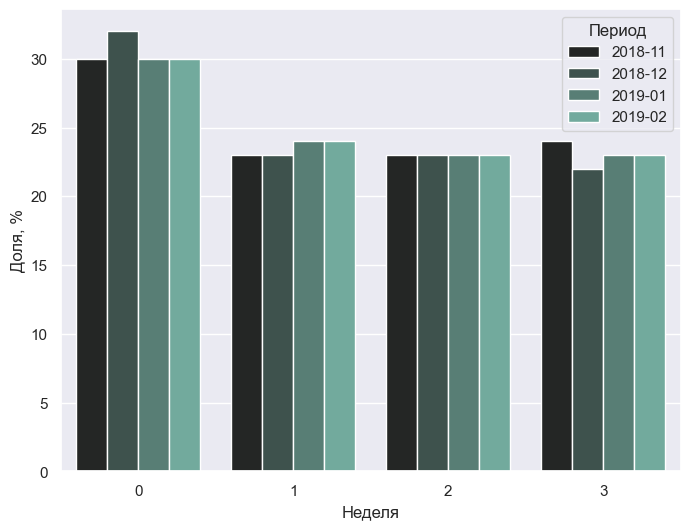

In [439]:
plt.figure(figsize=(8, 6))
sns.barplot(new_cl, x='Неделя', y='Доля, %', hue='Период', color='#69b3a2')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [481]:
clients = pd.read_csv('clients.csv', usecols=['client_id', 'first_issue_date'])

In [482]:
cl = clients.copy()

In [457]:
clients.first_issue_date = pd.to_datetime(clients.first_issue_date).dt.date
clients = clients.groupby('first_issue_date').client_id.count().reset_index()
clients.columns = ['Дата', 'Количество новых клиентов']

In [458]:
clients

,Дата,Количество новых клиентов
0,2017-04-04,1
1,2017-04-09,1
2,2017-04-10,615
3,2017-04-11,569
4,2017-04-12,611
...,...,...
702,2019-03-11,399
703,2019-03-12,79
704,2019-03-13,86
705,2019-03-14,67


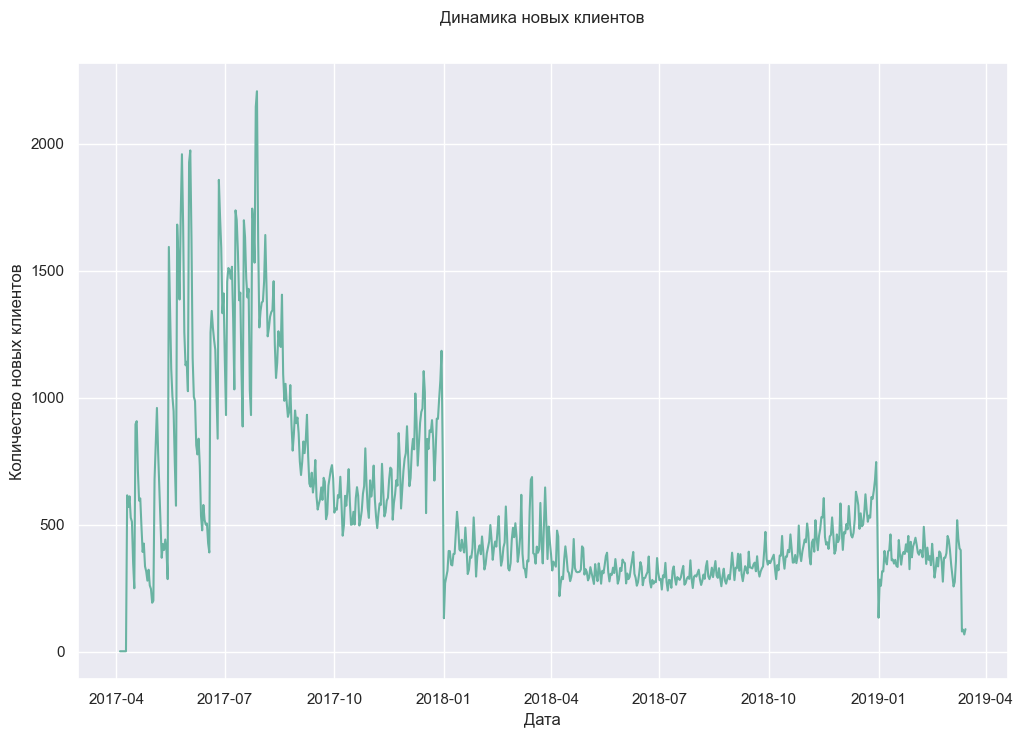

In [462]:
plt.figure(figsize=(12, 8))
sns.lineplot(clients, x='Дата', y='Количество новых клиентов', color='#69b3a2')
plt.title('Динамика новых клиентов')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [485]:
cl['period'] = pd.to_datetime(cl.first_issue_date).dt.to_period('M')
cl = cl.groupby('period').client_id.count().reset_index()

In [489]:
cl.rename({'client_id': 'Количество новых клиентов', 'period': 'Дата'}, axis=1, inplace=True)

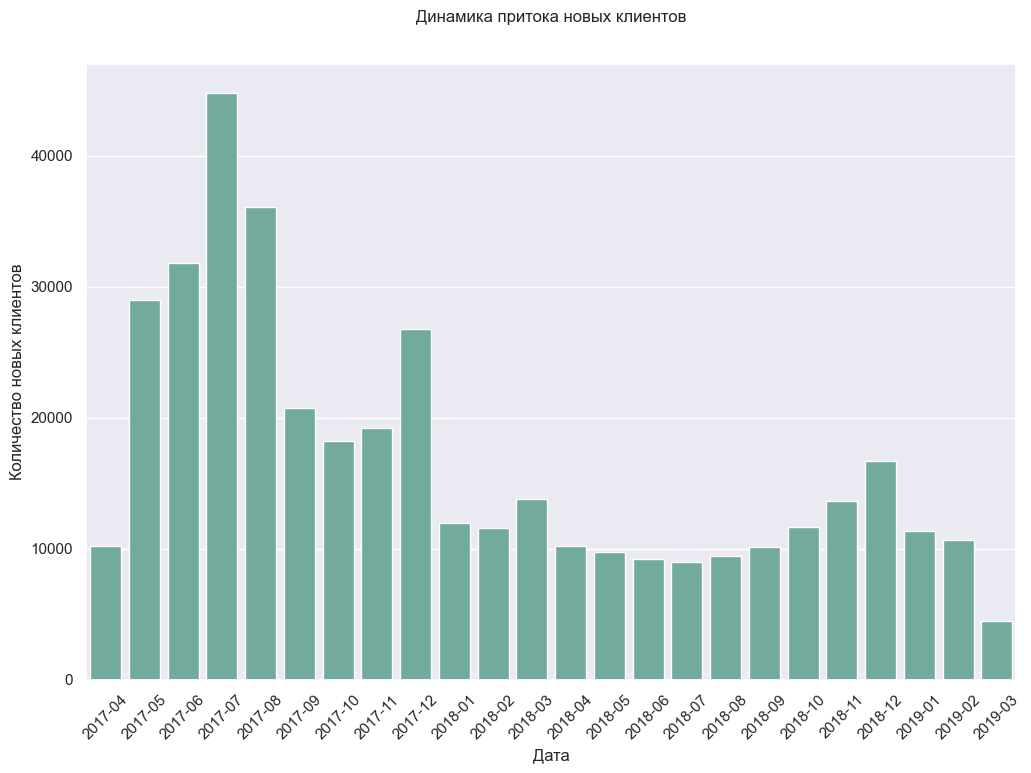

In [495]:
plt.figure(figsize=(12, 8))
sns.barplot(cl, x='Дата', y='Количество новых клиентов', color='#69b3a2')
plt.xticks(rotation=45)
plt.title('Динамика притока новых клиентов')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [5]:
pd.read_csv('purchases_processed.csv', nrows=1)

,client_id,transaction_id,transaction_datetime,sum_purchase,first_issue_date,age,gender,time_since_card,time_purchase_to_now,weeks_since_card
0,000012768d,6a0e96d0bc,2019-03-08,804,2017-08-05,45,U,more_than_90_days,30_days,82


In [9]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['transaction_datetime', 'sum_purchase', 'gender'])

In [10]:
purchases = purchases.groupby(['transaction_datetime', 'gender']).sum_purchase.mean().reset_index()

In [16]:
sns.set_theme(style="darkgrid")

In [28]:
p1 = purchases.groupby('gender').sum_purchase.mean().astype(int).reset_index()
p2 = purchases[purchases.transaction_datetime == '2018-12-30'][['gender', 'sum_purchase']]

In [29]:
p1 = pd.merge(p1, p2, on='gender')
p1.columns = ['gender', 'sum_purchase_mean', 'sum_purchase_30_dec']
p1['diff'] = p1['sum_purchase_30_dec'] - p1['sum_purchase_mean']
p1['ratio'] = p1['sum_purchase_30_dec'] / p1['sum_purchase_mean']

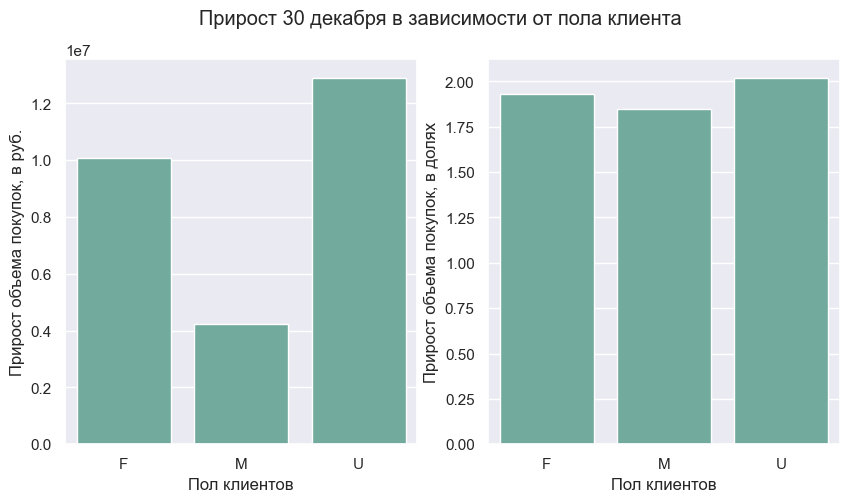

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.barplot(p1, x='gender', y='diff', color='#69b3a2')
plt.ylabel('Прирост объема покупок, в руб.')
plt.xlabel('Пол клиентов')
plt.subplot(122)
sns.barplot(p1, x='gender', y='ratio', color='#69b3a2')
plt.ylabel('Прирост объема покупок, в долях')
plt.xlabel('Пол клиентов')
plt.suptitle('Прирост 30 декабря в зависимости от пола клиента')
plt.savefig('output.jpg', dpi=500)
plt.show()

In [69]:
purchases = pd.read_csv('purchases_processed.csv', usecols=['client_id', 'transaction_datetime', 'sum_purchase', 'gender'])

In [70]:
purch = purchases.groupby(['client_id', 'transaction_datetime', 'gender']).sum_purchase.sum().reset_index()
purch = purch[purch.gender != 'U'].groupby(['transaction_datetime', 'gender']).sum_purchase.mean().astype(int).reset_index()

In [75]:
women_mean = purch[purch.gender == 'F'].sum_purchase.mean().astype(int)
men_mean = purch[purch.gender == 'M'].sum_purchase.mean().astype(int)

In [79]:
men = purchases[(purchases.transaction_datetime == '2018-12-30') & (purchases.gender == 'M')].groupby('client_id').sum_purchase.sum().to_numpy()
women = purchases[(purchases.transaction_datetime == '2018-12-30') & (purchases.gender == 'F')].groupby('client_id').sum_purchase.sum().to_numpy()

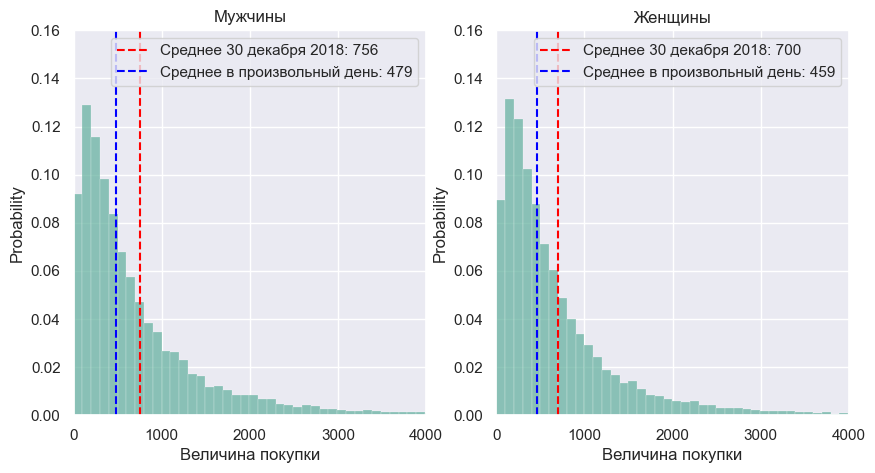

In [127]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Мужчины')
sns.histplot(men, stat='probability', color='#69b3a2', binwidth=100)
plt.vlines(x=men.mean(), ymin=0, ymax=0.16, linestyles='dashed',  colors='red', label=f'Среднее 30 декабря 2018: {men.mean().astype(int)}')
plt.vlines(x=men_mean, ymin=0, ymax=0.16, linestyles='dashed',  colors='blue', label=f'Среднее в произвольный день: {men_mean}')
plt.xlabel('Величина покупки')
plt.legend()
plt.xlim(0, 4000)
plt.ylim(0, 0.16)
plt.subplot(122)
plt.title('Женщины')
sns.histplot(women, stat='probability', color='#69b3a2', binwidth=100)
plt.vlines(x=women.mean(), ymin=0, ymax=0.16, linestyles='dashed',  colors='red', label=f'Среднее 30 декабря 2018: {women.mean().astype(int)}')
plt.vlines(x=women_mean, ymin=0, ymax=0.16, linestyles='dashed',  colors='blue', label=f'Среднее в произвольный день: {women_mean}')
plt.xlabel('Величина покупки')
plt.legend()
plt.xlim(0, 4000)
plt.ylim(0, 0.16)
plt.savefig('output.jpg', dpi=500)
plt.show()

In [101]:
lower_men, upper_men, boot_means_men = bootstrap_mean_confidence_interval(men, n_bootstrap=100000, alpha=0.05)
lower_women, upper_women, boot_means_women = bootstrap_mean_confidence_interval(women, n_bootstrap=100000, alpha=0.05)

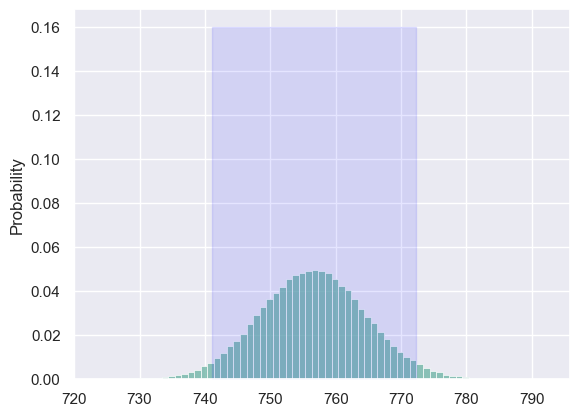

In [106]:
sns.histplot(np.array(boot_means_men), stat='probability', color='#69b3a2', binwidth=1)
plt.fill_between([lower_men, upper_men], [0.16, 0.16], color='blue', alpha=0.1)

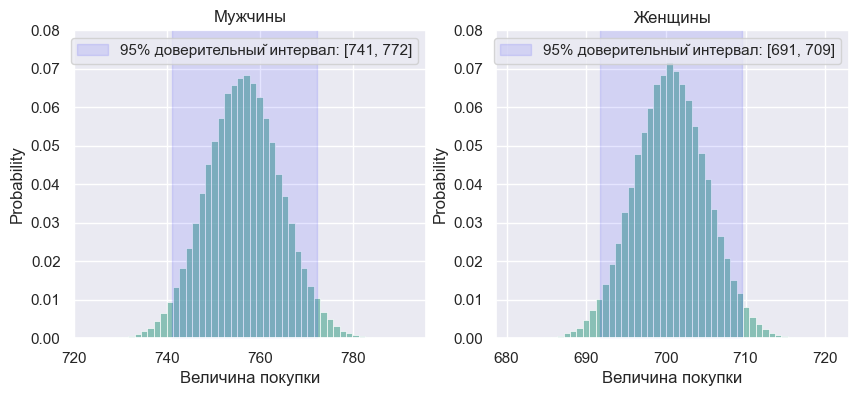

In [126]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title('Мужчины')
sns.histplot(np.array(boot_means_men), stat='probability', color='#69b3a2', bins=50)
plt.fill_between([lower_men, upper_men], [0.1, 0.1], color='blue', alpha=0.1, label=f'95% доверительный интервал: [{lower_men.astype(int)}, {upper_men.astype(int)}]')
plt.ylim(0, 0.08)
plt.legend()
plt.xlabel('Величина покупки')
plt.subplot(122)
plt.title('Женщины')
sns.histplot(np.array(boot_means_women), stat='probability', color='#69b3a2', bins=50)
plt.fill_between([lower_women, upper_women], [0.1, 0.1], color='blue', alpha=0.1, label=f'95% доверительный интервал: [{lower_women.astype(int)}, {upper_women.astype(int)}]')
plt.xlabel('Величина покупки')
plt.ylim(0, 0.08)
plt.legend()
plt.savefig('output.jpg', dpi=500)
plt.show()